<a href="https://colab.research.google.com/github/MuchammadAliRosyidi/DataMining/blob/main/naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



In [4]:
dataset = pd.read_csv('Social_Networking.csv', delimiter=';')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, -1].values



In [5]:
print(X)

[[    19  20000]
 [    23  19000]
 [    24  36000]
 [    18  45000]
 [    26  56000]
 [    25  46000]
 [    28  36000]
 [    29  78000]
 [    30  88000]
 [    27 123000]
 [    28  45000]
 [    24  57000]
 [    23  89000]
 [    22  34000]
 [    21  23500]
 [    31  49000]
 [    32  77000]]


In [6]:
print(y)

[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [8]:
print(X_train)

[[   26 56000]
 [   24 36000]
 [   21 23500]
 [   28 45000]
 [   29 78000]
 [   32 77000]
 [   24 57000]
 [   18 45000]
 [   19 20000]
 [   25 46000]
 [   31 49000]
 [   23 89000]]


In [9]:
print(X_test)

[[    23  19000]
 [    28  36000]
 [    30  88000]
 [    27 123000]
 [    22  34000]]


In [10]:
print(y_train)

[0 0 0 1 0 0 0 0 0 0 0 0]


In [11]:
print(y_test)

[0 0 0 0 0]


In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
print(X_train)

[[ 0.23461857  0.20729345]
 [-0.23461857 -0.77786356]
 [-0.93847426 -1.39358669]
 [ 0.7038557  -0.3345429 ]
 [ 0.93847426  1.29096617]
 [ 1.64232996  1.24170832]
 [-0.23461857  0.25655131]
 [-1.64232996 -0.3345429 ]
 [-1.4077114  -1.56598917]
 [ 0.         -0.28528505]
 [ 1.4077114  -0.1375115 ]
 [-0.46923713  1.83280253]]


In [14]:
print(X_test)

[[-0.46923713 -1.61524702]
 [ 0.7038557  -0.77786356]
 [ 1.17309283  1.78354468]
 [ 0.46923713  3.50756945]
 [-0.7038557  -0.87637926]]


In [15]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [16]:
y_pred = classifier.predict(X_test)

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[5]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


<ipython-input-18-7db3848767db>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


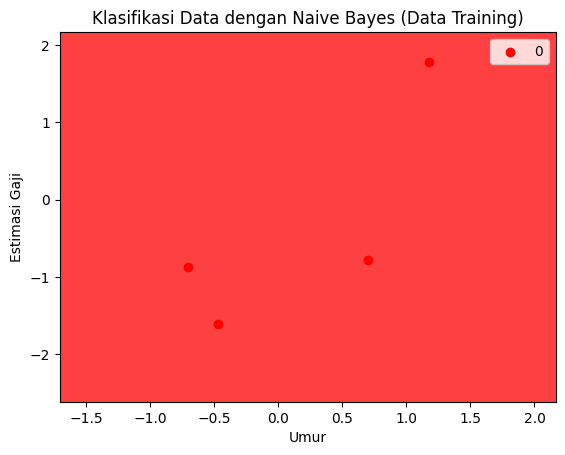

In [18]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:,0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01))
plt.contourf (X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
              alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Klasifikasi Data dengan Naive Bayes (Data Training)')
plt.xlabel('Umur')
plt.ylabel('Estimasi Gaji')
plt.legend()
plt.show()